In [1]:
# Importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import data
URL = "C:\\Users\\HP\Downloads\\Jan-24 project - Jan-24 project.csv"
data = pd.read_csv(URL)

In [3]:
# data.dropna(axis=0, how='any', subset=["product_title", "brand"], inplace=True)
data.drop(['availability_status'], axis=1, inplace=True)

In [4]:
# Adding discount percent for each product
data["discount_percent"] = ((data["original_price"] - data["selling_price"])/data["original_price"])*100

# Diversification v/s average rating
## a brand is focused(less diversified)(product types) == average rating is high ??
## Have recognizable brands

In [5]:
brands = data['brand'].value_counts()
major_brands = brands[brands>50]
# Chose 102 top brands based on number of products 

major_brands_names = major_brands.index
dic=[]
for i in major_brands_names:    
    select_brand = data[data['brand']==i]
    no_of_prods = len(select_brand['product_type'].unique())
    brand_rating = select_brand['product_rating'].mean()
    dic.append({'brand':i, 'product_types':no_of_prods, 'brand_rating':brand_rating})

diverse = pd.DataFrame(dic, columns=['brand', 'product_types', 'brand_rating'])
# Remove brands with null rating
# diverse.drop([59,97], axis=0, inplace=True)
diverse.sort_values('product_types').tail(20)

,brand,product_types,brand_rating
54,The Moms Co,15,3.991837
99,Nutriorg,15,3.979412
19,Britannia,15,4.191209
28,HappyChef,16,4.171429
67,bb Popular,16,4.009375
26,Mamaearth,16,3.939744
14,BIOTIQUE,16,4.008738
6,Amul,17,4.041830
72,Earthon,19,4.325806
97,PRISTINE,19,3.929787


In [11]:
# Horizontal growth - for a category list number of brands its in. then check how many product types/ subcategory the brand is in 
categories = data['category'].value_counts().index

for i in categories:
    hgrow = data[data["category"]==i]
    brands_in_cat = hgrow["brand"].value_counts().index
#     print(len(brands_in_cat))
    for j in brands_in_cat:
        print(j,"\n", hgrow[hgrow["brand"]==j]["product_subcategory"].value_counts())

INATUR 
 Skin Care           116
Bath & Hand Wash     17
Hair Care             8
Men's Grooming        5
Name: product_subcategory, dtype: int64
Nike 
 Fragrances & Deos    96
Men's Grooming       23
Bath & Hand Wash      5
Name: product_subcategory, dtype: int64
BIOTIQUE 
 Skin Care            80
Hair Care            19
Bath & Hand Wash      9
Fragrances & Deos     4
Men's Grooming        2
Feminine Hygiene      1
Name: product_subcategory, dtype: int64
Aroma Magic 
 Skin Care           92
Hair Care           12
Bath & Hand Wash     5
Name: product_subcategory, dtype: int64
Himalaya 
 Skin Care            58
Bath & Hand Wash     24
Hair Care            19
Oral Care             4
Health & Medicine     1
Makeup                1
Name: product_subcategory, dtype: int64
Colgate 
 Oral Care    107
Name: product_subcategory, dtype: int64
Loreal Paris 
 Hair Care         64
Skin Care         31
Men's Grooming     6
Makeup             3
Name: product_subcategory, dtype: int64
Dabur 
 Health & 

# Reference product - check similar rating brands - if prices are abnormally low for a product then there is a margin for price increase

In [108]:
products = data['product_title'].value_counts()
repeat_products = products[products>9]
repeat_products_name = repeat_products.index
l = []
for i in repeat_products_name:
#     l=[]
    select_prod = data[data["product_title"] == i]
    print(select_prod.drop(["product_id", "product_description","customer_reviews_count","seasonal_indicator","promotion_indicator","bundle_indicator","customer_demographics"],axis=1))

                      product_title                  category  \
144    Turmeric Powder/Arisina Pudi  Foodgrains, Oil & Masala   
3541   Turmeric Powder/Arisina Pudi  Foodgrains, Oil & Masala   
5389   Turmeric Powder/Arisina Pudi  Foodgrains, Oil & Masala   
5719   Turmeric Powder/Arisina Pudi  Foodgrains, Oil & Masala   
5897   Turmeric Powder/Arisina Pudi  Foodgrains, Oil & Masala   
6303   Turmeric Powder/Arisina Pudi  Foodgrains, Oil & Masala   
12231  Turmeric Powder/Arisina Pudi  Foodgrains, Oil & Masala   
13882  Turmeric Powder/Arisina Pudi  Foodgrains, Oil & Masala   
14061  Turmeric Powder/Arisina Pudi  Foodgrains, Oil & Masala   
14133  Turmeric Powder/Arisina Pudi  Foodgrains, Oil & Masala   
16702  Turmeric Powder/Arisina Pudi  Foodgrains, Oil & Masala   
17093  Turmeric Powder/Arisina Pudi  Foodgrains, Oil & Masala   
17456  Turmeric Powder/Arisina Pudi  Foodgrains, Oil & Masala   
17583  Turmeric Powder/Arisina Pudi  Foodgrains, Oil & Masala   
17982  Turmeric Powder/Ar

# Discount v/s rating (The Indian Jugaad)

In [96]:
import textwrap
def wrap_labels(ax, width, break_long_words=False):
    labels = []
    for label in ax.get_xticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width=width,
                      break_long_words=break_long_words))
    ax.set_xticklabels(labels, rotation=0)

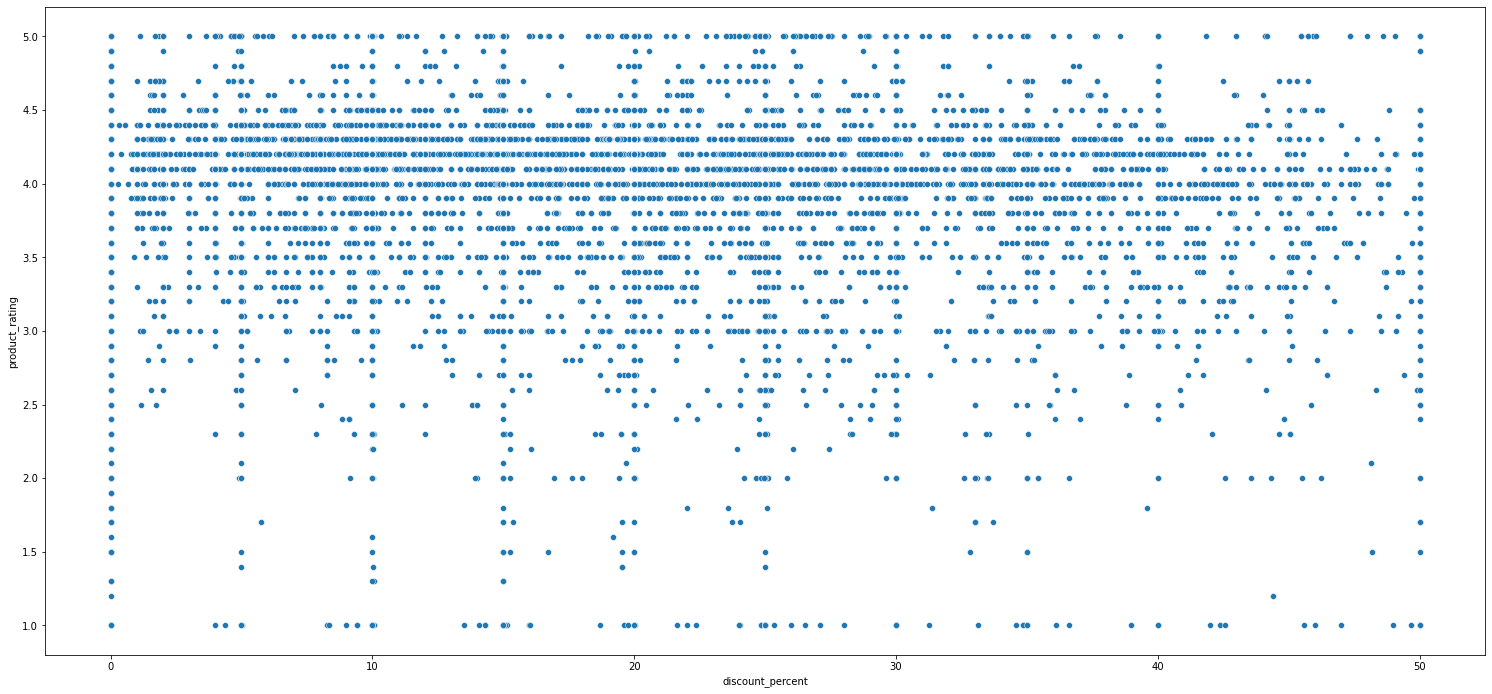

In [120]:
disc_rating = data

Q1 = disc_rating["discount_percent"].quantile(0.25)
Q3 = disc_rating["discount_percent"].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

disc_rating.drop(disc_rating[(disc_rating["discount_percent"] < Q1 - 1.5*IQR) | (disc_rating["discount_percent"] >Q3 + 1.5*IQR)].index, axis=0, inplace=True)

fig = plt.figure(figsize=(20,9))
ax = fig.add_axes([0,0,1,1])

sns.scatterplot(data=disc_rating, x="discount_percent", y="product_rating")


# Put all products in the quadrant (price/rating) setup and check the percentage of products in all 4 quads, if it's not equal then we are not catering to some section of the market. So either on board new brands or ask existing ones to horizontally diversify.


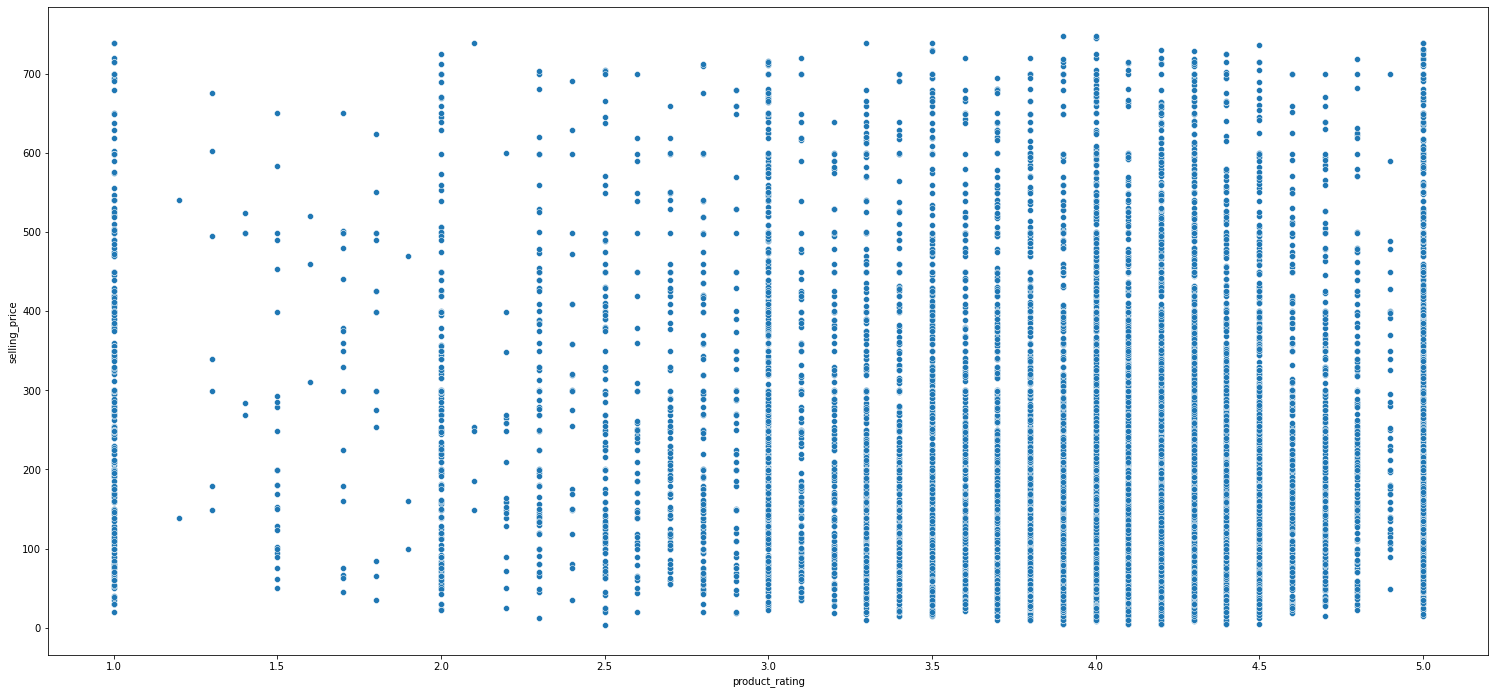

In [111]:
price_rating = data

Q1 = price_rating["selling_price"].quantile(0.25)
Q3 = price_rating["selling_price"].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

price_rating.drop(price_rating[(disc_rating["selling_price"] < Q1 - 1.5*IQR) | (price_rating["selling_price"] >Q3 + 1.5*IQR)].index, axis=0, inplace=True)

fig = plt.figure(figsize=(20,9))
ax = fig.add_axes([0,0,1,1])

sns.scatterplot(data=price_rating, x="product_rating", y="selling_price")
# wrap_labels(ax, 10)

# Beauty & hygiene products are impervious to price sensitivity - offload petroleum price onto to users themself - Quadrant setup - high rating and high price products are generally impervious to price sensitivity -  beauty & hygiene highly rely on petroleum - majority in top right quad

C:\Users\HP\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


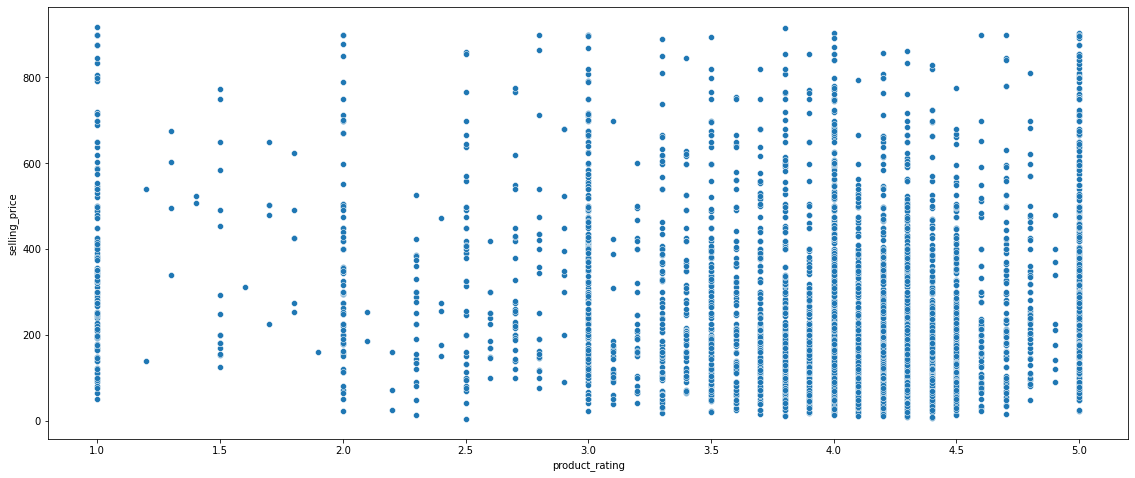

In [99]:
beaut_hyg = data[data["category"] == "Beauty & Hygiene"]

Q1 = beaut_hyg["selling_price"].quantile(0.25)
Q3 = beaut_hyg["selling_price"].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

# ind = beaut_hyg[(beaut_hyg["selling_price"] < lower) | (beaut_hyg["selling_price"] > upper)]
beaut_hyg.drop(beaut_hyg[(beaut_hyg["selling_price"] < Q1 - 1.5*IQR) | (beaut_hyg["selling_price"] >Q3 + 1.5*IQR)].index, axis=0, inplace=True)

fig = plt.figure(figsize=(15,6))
ax = fig.add_axes([0,0,1,1])

sns.scatterplot(data=beaut_hyg, x="product_rating", y="selling_price")

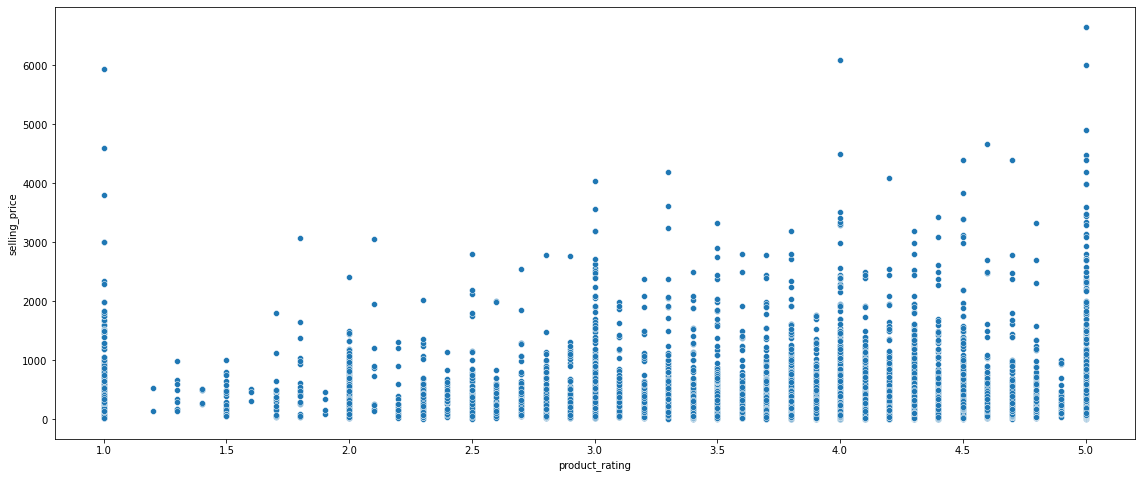

In [100]:
# beaut_hyg = data[data["category"] == "Beauty & Hygiene"]

Q1 = beaut_hyg.quantile(0.25)
Q3 = beaut_hyg.quantile(0.75)
IQR = Q3 - Q1

# beaut_hyg.drop(beaut_hyg[(beaut_hyg < Q1 - 1.5*IQR) | (beaut_hyg >Q3 + 1.5*IQR)].index, axis=0)

fig = plt.figure(figsize=(15,6))
ax = fig.add_axes([0,0,1,1])

sns.scatterplot(data=data, x="product_rating", y="selling_price")

# Some product types doesnt care for brand - check variance in rating, if less then brand does not matter. - if so, less marketing required or good time to introduce a new high value brand, create artificial urge to buy new or platform can introduce their product. **

In [101]:
subcategories = data["product_subcategory"].value_counts().index
l = []
for i in subcategories:
    select_subcat = data[data["product_subcategory"] == i]
    l.append({"subcategory":i, "rating_std":select_subcat["product_rating"].std()})
rating_variance = pd.DataFrame(l, columns=["subcategory", "rating_std"])
rating_variance.dropna(axis=0).sort_values("rating_std")

,subcategory,rating_std
86,Water,0.286356
42,Rice & Rice Products,0.290696
76,Ice Creams & Desserts,0.298888
27,Biscuits & Cookies,0.312151
20,Dairy,0.324893
...,...,...
10,Drinks & Beverages,0.942988
15,Chocolates & Biscuits,0.963099
4,Fragrances & Deos,0.984917
1,Health & Medicine,1.009442


# Check the number of brands in beauty & hygiene to check if only some players are capturing the whole market.

In [121]:
data[data["category"] == "Beauty & Hygiene"].shape

(6785, 17)

In [127]:
categories = data["category"].value_counts().index
for i in categories:
    df = data[data["category"] == i]
    brands_beaut = df["brand"].value_counts()
    brands_beaut["market_share"] = (brands_beaut/df.shape[0])*100
    print(i,"\n", brands_beaut["market_share"], "\n")

Beauty & Hygiene 
 INATUR               1.960206
Nike                 1.680177
BIOTIQUE             1.621223
Himalaya             1.562270
Colgate              1.532793
                       ...   
Abbies               0.014738
Kent                 0.014738
SEMCO                0.014738
Aveeno               0.014738
Happily Unmarried    0.014738
Name: brand, Length: 564, dtype: float64 

Gourmet & World Food 
 GoodDiet          2.140884
Puramate          1.933702
Nutty Yogi        1.818600
True Elements     1.634438
TGL Co.           1.611418
                    ...   
Lee               0.023020
Cpp               0.023020
Toonpops          0.023020
Frubites          0.023020
Elephant House    0.023020
Name: brand, Length: 525, dtype: float64 

Kitchen, Garden & Pets 
 BB Home          9.486448
DP               4.493581
Iveo             4.065621
Claycraft        3.245364
Cello            3.102710
                   ...   
IAMS             0.035663
Cosmo            0.035663
Steelo Sunpe